In [ ]:
with open('metadata.csv','r',encoding='utf-8') as f:
  lines = f.readlines()

def split(s):
  i=0
  res = []
  while i<len(s):
    if s[i]=='"':
      j = s.find('"',i+1)
      res.append(s[i+1:j])
      i=j+2
    elif s[i]==',':
      i+=1
      # res.append('')
    else:
      j = s.find(',',i+1)
      if j<0:
        res.append(s[i])
        i = len(s)
      else:
        res.append(s[i:j])
        i=j+1
  return res

db = [ split(x.strip().replace('""','')) for x in lines[1:500000] ]

In [ ]:
print(''.join(lines[:5]))

cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,"Clinical features of culture-proven Mycoplasma pneumoniae infections at King Abdulaziz University Hospital, Jeddah, Saudi Arabia",10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,"OBJECTIVE: This retrospective chart review describes the epidemiology and clinical features of 40 patients with culture-proven Mycoplasma pneumoniae infections at King Abdulaziz University Hospital, Jeddah, Saudi Arabia. METHODS: Patients with positive M. pneumoniae cultures from respiratory specimens from January 1997 through December 1998 were identified through the Microbiology records. Charts of patients were reviewed. RESULTS: 40 patients were identified, 33 (82.5%) of whom required admission. Most infections (92.5%) were community-acquired. The infection affected all age groups but was mo

In [ ]:
db[0][10]

'Madani, Tariq A; Al-Ghamdi, Aisha A'

In [ ]:
authors = {}
for x in db:
  year = int(x[9][:4])
  auth = x[10].split(';')
  for a in auth:
    a = a.strip()
    if len(a)==0:
      continue
    if a in authors.keys():
      authors[a][year] = authors[a].get(year,0)+1
    else:
      authors[a] = { year : 1 }


In [ ]:
import json
json.dumps(authors)

with open('authors.json','w',encoding='utf-8') as f:
  json.dump(authors,f,indent=4,ensure_ascii=False)

In [ ]:
import yaml
with open('authors.yaml','wb') as f:
  f.write(yaml.safe_dump(authors,encoding='utf-8'))

In [ ]:
from tqdm import tqdm

medications = [
    'hydroxychloroquine', 'chloroquine', 'tocilizumab', 'remdesivir', 'azithromycin', 
    'lopinavir', 'ritonavir', 'dexamethasone', 'heparin', 'favipiravir', 'methylprednisolone']

res = { m : {} for m in medications }
for x in tqdm(db):
  time = x[9][:7]
  for m in medications:
    if m in x[8]:
      res[m][time] = res[m].get(time,0)+1
    

100%|██████████| 499999/499999 [00:07<00:00, 68535.69it/s]


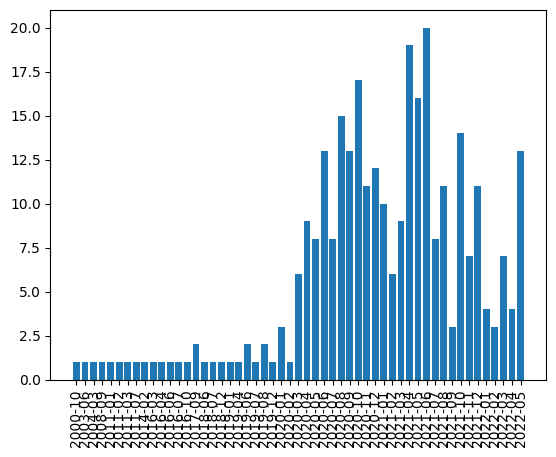

In [ ]:
import matplotlib.pyplot as plt

def plot(d,ax=plt):
  d = [ (k,v) for k,v in d.items() if len(k)>4 ]
  d.sort(key=lambda x : x[0])
  u,v = zip(*d)
  ax.bar(u,v)
  plt.xticks(rotation=90)

plot(res['heparin'])

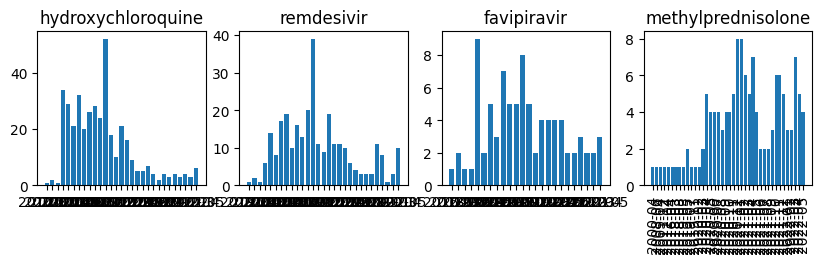

In [ ]:
m = ['hydroxychloroquine', 'remdesivir', 'favipiravir', 'methylprednisolone' ]

fig,ax = plt.subplots(1,len(m),figsize=(10,2))
for i,x in enumerate(m):
  plot(res[x],ax[i])
  ax[i].set_title(x)